# Analysis of Obesity data for different countries 

## Exploring Datasets with pandas and Matplotlib

### Toolkits: The course heavily relies on pandas and Numpy for data wrangling, analysis, and visualization. The primary plotting library that we are exploring in the course is Matplotlib.

### Dataset: List Obesity rate from each country based on population from 1975 to 2017 picked from kaggle.com for learning Data Science

In [117]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library


In [118]:
# Read the CSV format excel that was saved in local drives. 

df_obes=pd.read_csv("/resources/data/Obesity-Cleaned.csv")

df_obes.head()


,Unnamed: 0,Country,Year,Obesity (%),Sex
0,0,Afghanistan,1975,0.5 [0.2-1.1],Both sexes
1,1,Afghanistan,1975,0.2 [0.0-0.6],Male
2,2,Afghanistan,1975,0.8 [0.2-2.0],Female
3,3,Afghanistan,1976,0.5 [0.2-1.1],Both sexes
4,4,Afghanistan,1976,0.2 [0.0-0.7],Male


#### 1) Clean up dataset to remove rows/colums which has least significance or not imformative.

In [119]:
# Per each county and each year we have three rows 1) Both genders ,2)Male and 3)Female. 
# Let us concentrate on overall population for country

df_obesity = df_obes[(df_obes['Sex'] == 'Both sexes')]

df_obesity.head()


,Unnamed: 0,Country,Year,Obesity (%),Sex
0,0,Afghanistan,1975,0.5 [0.2-1.1],Both sexes
3,3,Afghanistan,1976,0.5 [0.2-1.1],Both sexes
6,6,Afghanistan,1977,0.6 [0.2-1.2],Both sexes
9,9,Afghanistan,1978,0.6 [0.2-1.3],Both sexes
12,12,Afghanistan,1979,0.6 [0.3-1.3],Both sexes


#### 2) Rename columns for more readability and drop columns which are not required. 
###### Since we are not concentrating on" gender in our initial analysis, we can drop column "SEX"

In [120]:
df_obesity.columns


Index(['Unnamed: 0', 'Country', 'Year', 'Obesity (%)', 'Sex'], dtype='object')

In [121]:
# All datatypes are object , covert obesity percentage to float and remove range.
# Since we are not concentrating on" gender in our initial analysis, we can drop column "SEX", drop te 

df_obesity.drop(['Sex'], axis=1 , inplace=True)
df_obesity.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Unnamed: 0,Country,Year,Obesity (%)
0,0,Afghanistan,1975,0.5 [0.2-1.1]
3,3,Afghanistan,1976,0.5 [0.2-1.1]
6,6,Afghanistan,1977,0.6 [0.2-1.2]
9,9,Afghanistan,1978,0.6 [0.2-1.3]
12,12,Afghanistan,1979,0.6 [0.3-1.3]


In [122]:
#### Check whether there are any null values/ missing values for Obesity percentage before converting datatype from string to float. 
## df_obesity.dropna(subset=["Obesity (%)"], axis=0, inplace= True) 
df_obesity["Obesity (%)"].str[0:4].unique()




array(['0.5 ', '0.6 ', '0.7 ', '0.8 ', '0.9 ', '1.0 ', '1.1 ', '1.2 ',
       '1.3 ', '1.4 ', '1.5 ', '1.6 ', '1.7 ', '1.8 ', '1.9 ', '2.1 ',
       '2.2 ', '2.3 ', '2.4 ', '2.6 ', '2.7 ', '2.9 ', '3.0 ', '3.2 ',
       '3.4 ', '3.6 ', '3.8 ', '4.0 ', '4.2 ', '4.4 ', '4.7 ', '4.9 ',
       '5.2 ', '5.5 ', '6.5 ', '6.7 ', '6.8 ', '7.0 ', '7.2 ', '7.4 ',
       '7.6 ', '7.8 ', '8.0 ', '8.3 ', '8.5 ', '8.7 ', '9.0 ', '9.3 ',
       '9.5 ', '9.8 ', '10.1', '10.4', '10.7', '11.0', '11.3', '11.7',
       '12.0', '12.4', '12.8', '13.2', '13.6', '14.0', '14.5', '14.9',
       '15.4', '16.0', '16.5', '17.0', '17.6', '18.2', '18.8', '19.3',
       '19.9', '20.5', '21.1', '21.7', '6.9 ', '7.7 ', '8.6 ', '9.4 ',
       '9.7 ', '10.2', '10.6', '11.5', '11.9', '13.3', '13.8', '14.3',
       '14.8', '15.3', '15.8', '16.3', '16.8', '17.4', '17.9', '18.5',
       '19.1', '19.6', '20.2', '20.8', '21.4', '22.0', '22.7', '23.3',
       '24.0', '24.7', '25.3', '26.0', '26.7', '27.4', '12.9', '13.5',
      

In [123]:
# there are few conutries with "NO Data" as Obesity percentage, Analyze whether it is for few years or whole country.

df_obesity[(df_obesity['Obesity (%)'] =='No data')].Country.unique()

array(['Monaco', 'San Marino', 'South Sudan', 'Sudan'], dtype=object)

In [124]:
# We have four countries obesity % data is not available for any year, We can drop it.  
df_obesty= df_obesity[(df_obesity['Obesity (%)'] !='No data')]
df_obesty.head()

,Unnamed: 0,Country,Year,Obesity (%)
0,0,Afghanistan,1975,0.5 [0.2-1.1]
3,3,Afghanistan,1976,0.5 [0.2-1.1]
6,6,Afghanistan,1977,0.6 [0.2-1.2]
9,9,Afghanistan,1978,0.6 [0.2-1.3]
12,12,Afghanistan,1979,0.6 [0.3-1.3]


In [125]:
# Converting data type into float from string to perform calculation. 
df_obesty['Obesity']=df_obesty['Obesity (%)'].str[0:4].astype(float)
df_obesty.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Unnamed: 0,Country,Year,Obesity (%),Obesity
0,0,Afghanistan,1975,0.5 [0.2-1.1],0.5
3,3,Afghanistan,1976,0.5 [0.2-1.1],0.5
6,6,Afghanistan,1977,0.6 [0.2-1.2],0.6
9,9,Afghanistan,1978,0.6 [0.2-1.3],0.6
12,12,Afghanistan,1979,0.6 [0.3-1.3],0.6


In [126]:
# Check the Year range and transpose years into columns 

# df_obesty.Year.unique()
# Range = [1975 to 2016 ]

# Dropping columns that might not be required 
df_obesty.drop(['Obesity (%)','Unnamed: 0'],axis=1,inplace=True)


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [127]:
df_obesty.head()

,Country,Year,Obesity
0,Afghanistan,1975,0.5
3,Afghanistan,1976,0.5
6,Afghanistan,1977,0.6
9,Afghanistan,1978,0.6
12,Afghanistan,1979,0.6


### From Formatted dataset , Analyze the Obesity pattern for different countries. 



#### We have 191 countries for analysis and Identify top 15 countries with more Obesity and less obesity rate in 2016 


In [130]:
df_2016 = df_obesty[(df_obesty['Year'] == 2016)]
df_2016.count() # number of countries for analysis 
# df_2016.columns= ['Country','Obesity']
df_2016.drop(['Year'], axis=1,inplace=True)
df_2016.set_index('Country', inplace=True)
df_2016.head()

df_1975 = df_obesty[(df_obesty['Year'] == 1975)]
df_1975.count() # number of countries for analysis 
# df_2016.columns= ['Country','Obesity']
df_1975.drop(['Year'], axis=1,inplace=True)
df_1975.set_index('Country', inplace=True)
df_1975.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Obesity
Country,
Afghanistan,0.5
Albania,6.5
Algeria,6.9
Andorra,12.9
Angola,0.8


In [131]:
df_top15_Obese_List=df_2016.sort_values('Obesity',ascending=False).head(15)

#### From above anlysis , excluding islands with less population and picking only countries, we have below 5 countries with more Obesity
1) Kuwait       | 37.9                     
2) USA          | 36.2                          
3) Jordan       | 35.5                         
4) Saudi Arabia | 35.4                
5) Qatar        | 35.1               


In [132]:
df_Bottom15_Obese_list=df_2016.sort_values('Obesity',ascending=True).head(15)

#### From above anlysis , we have below 5 countries with more Obesity
1) Vietnam      | 2.1                    
2) Bangladesh   | 3.6                          
3) India        | 3.9                        
4) Cambodia     | 3.9                
5) Nepal        | 4.2

## Analyze whether Obesity rate is decreasing in any country ..  

##### Quick way is to verify whether mean , median mode is greater than 2016 Obesity rate. 

In [133]:
df_mean1=df_obesty.groupby(['Country'])['Obesity'].mean()
df_mean=df_mean1.to_frame()
print(df_mean.head())
df_median1=df_obesty.groupby(['Country'])['Obesity'].median()
df_median=df_median1.to_frame()
print(df_median.head())
df_mean.head()
#df_mode1=df_obesty.groupby(['Country'])['Obesity'].mode()
#df_mode=df_mode1.to_frame()
#print(df_mode.head())

               Obesity
Country               
Afghanistan   2.190476
Albania      12.445238
Algeria      15.714286
Andorra      20.495238
Angola        3.414286
             Obesity
Country             
Afghanistan     1.75
Albania        11.50
Algeria        15.05
Andorra        21.10
Angola          2.80


,Obesity
Country,
Afghanistan,2.190476
Albania,12.445238
Algeria,15.714286
Andorra,20.495238
Angola,3.414286


In [137]:
df_2016['1975']=df_median['Obesity']
df_2016['mean']=df_mean['Obesity']
df_2016['median']=df_median['Obesity']

df_Obese_analyze=df_2016.rename(columns={'Obesity':'2016-Obesity','1975':'1975-Obesity'})
df_Obese_analyze.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

,2016-Obesity,1975-Obesity,mean,median
Country,,,,
Afghanistan,5.5,1.75,2.190476,1.75
Albania,21.7,11.50,12.445238,11.50
Algeria,27.4,15.05,15.714286,15.05
Andorra,25.6,21.10,20.495238,21.10
Angola,8.2,2.80,3.414286,2.80


# Number of countries to Analyze 

In [142]:
df_Obese_analyze[(df_Obese_analyze['2016-Obesity'] <= df_Obese_analyze['1975-Obesity'])]

,2016-Obesity,1975-Obesity,mean,median
Country,,,,


# Analyze the Obesity ratio value , drop the unwanted data and analyze missing values records. 

In [7]:

ObesityData['Obesity']=ObesityData['Obesity (%)'].astype(float).str[0:4]
ObesityDF = ObesityData[['Country','Year','Obesity']]
ObesityDF

,Country,Year,Obesity
0,Afghanistan,1975,0.5
1,Afghanistan,1975,0.2
2,Afghanistan,1975,0.8
3,Afghanistan,1976,0.5
4,Afghanistan,1976,0.2
...,...,...,...
24565,Zimbabwe,2015,4.5
24566,Zimbabwe,2015,24.8
24567,Zimbabwe,2016,15.5
24568,Zimbabwe,2016,4.7


In [8]:
# Validate the list of unique value in Obesity field and validate any cleanup is required.
ObesityDF.Obesity.unique()

# Looks like there are few rows with "No data".. 

array(['0.5 ', '0.2 ', '0.8 ', '0.6 ', '0.9 ', '0.3 ', '1.0 ', '0.7 ',
       '1.1 ', '1.2 ', '0.4 ', '1.3 ', '1.4 ', '1.5 ', '1.6 ', '1.7 ',
       '1.8 ', '1.9 ', '2.1 ', '2.2 ', '2.3 ', '2.4 ', '2.6 ', '2.7 ',
       '2.9 ', '3.0 ', '3.2 ', '3.4 ', '3.6 ', '3.8 ', '4.0 ', '4.2 ',
       '4.4 ', '4.7 ', '4.9 ', '2.0 ', '5.2 ', '5.4 ', '5.7 ', '6.0 ',
       '2.5 ', '6.3 ', '6.6 ', '2.8 ', '7.0 ', '7.3 ', '5.5 ', '7.6 ',
       '6.5 ', '8.6 ', '6.7 ', '4.6 ', '8.8 ', '6.8 ', '4.8 ', '8.9 ',
       '5.0 ', '9.1 ', '7.2 ', '9.3 ', '7.4 ', '9.5 ', '5.6 ', '9.7 ',
       '7.8 ', '5.8 ', '9.9 ', '8.0 ', '10.1', '8.3 ', '10.3', '8.5 ',
       '10.6', '8.7 ', '10.8', '9.0 ', '11.0', '11.3', '11.5', '9.8 ',
       '7.9 ', '11.7', '8.2 ', '12.0', '10.4', '12.2', '10.7', '12.5',
       '9.2 ', '12.8', '9.6 ', '13.1', '10.0', '13.4', '13.7', '12.4',
       '14.0', '11.2', '14.3', '13.2', '14.7', '13.6', '12.1', '15.0',
       '12.6', '15.4', '14.5', '15.8', '14.9', '16.2', '16.6', '16.0',
      

In [9]:
# number of countries with  no data in obesity column

ObesityDF[ObesityDF['Obesity'] == 'No d'].Country.unique()

array(['Monaco', 'San Marino', 'South Sudan', 'Sudan'], dtype=object)

In [10]:
# Check whether for above four countries all years data is missing or just few years data , 
# if all years data for a country is missing then we can drop this country from analysis. 

ObesityDF[ObesityDF['Country'] == 'Monaco']

,Country,Year,Obesity
14112,Monaco,1975,No d
14113,Monaco,1975,No d
14114,Monaco,1975,No d
14115,Monaco,1976,No d
14116,Monaco,1976,No d
...,...,...,...
14233,Monaco,2015,No d
14234,Monaco,2015,No d
14235,Monaco,2016,No d
14236,Monaco,2016,No d


### Since all the 4 countries ['Monaco', 'San Marino', 'South Sudan', 'Sudan'] have obesity percentage ratio not available , 
### Dropping those records and converting percentage into float datatype 



In [11]:
ObesityCleanDF = ObesityDF[ObesityDF['Obesity'] != 'No d']
ObesityCleanDF['Obesity'] = ObesityCleanDF['Obesity'].astype(float)
ObesityCleanDF

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Country,Year,Obesity
0,Afghanistan,1975,0.5
1,Afghanistan,1975,0.2
2,Afghanistan,1975,0.8
3,Afghanistan,1976,0.5
4,Afghanistan,1976,0.2
...,...,...,...
24565,Zimbabwe,2015,4.5
24566,Zimbabwe,2015,24.8
24567,Zimbabwe,2016,15.5
24568,Zimbabwe,2016,4.7


#### List top 10 countries with more obesity rate and top 10 countires with less obesity rate. 
#### Since we have obesity percentage for each year for each country, , 
#### We create a new DF with groupby county and mean of all year obesity percentage. 

In [12]:
ObesitySF=ObesityCleanDF.groupby(['Country'])['Obesity'].mean()
type(ObesitySF)
ObesitySF=ObesityCleanDF.groupby(['Country'])['Obesity'].mean()


pandas.core.series.Series

In [13]:
# Convert Panda series to 
# Add header and round off to two digit mean 

ObesityPerCountry=pd.DataFrame({'Country':ObesitySF.index, 'Avg-Obesity-percentage':ObesitySF.values})
ObesityPerCountry.head()

,Country,Avg-Obesity-percentage
0,Afghanistan,2.175397
1,Albania,12.454762
2,Algeria,15.646825
3,Andorra,20.434127
4,Angola,3.349206


In [15]:
# Top 10 countries with low average obesity rate 
ObesityPerCountry.sort_values('Avg-Obesity-percentage').head(10) 


,Country,Avg-Obesity-percentage
187,Viet Nam,0.676190
13,Bangladesh,1.312698
169,Timor-Leste,1.340476
29,Cambodia,1.396032
119,Nepal,1.509524
78,India,1.551587
93,Lao People's Democratic Republic,1.749206
59,Ethiopia,1.833333
26,Burkina Faso,2.028571
161,Sri Lanka,2.049206


In [14]:
# Top 10 countries with high average obesity rate 
ObesityPerCountry.sort_values('Avg-Obesity-percentage',ascending=False).head(10) 

,Country,Avg-Obesity-percentage
118,Nauru,53.093651
129,Palau,42.130952
39,Cook Islands,41.853175
107,Marshall Islands,40.512698
176,Tuvalu,35.123810
125,Niue,34.350000
171,Tonga,33.753175
147,Samoa,33.666667
111,Micronesia (Federated States of),31.968254
90,Kiribati,31.257937


#### Top 15 countries with more Obesuty ratio and top 15 countries with less Obesity ratio

Text(0.5, 1.0, 'Bottom 15 countries with more obesity rate')

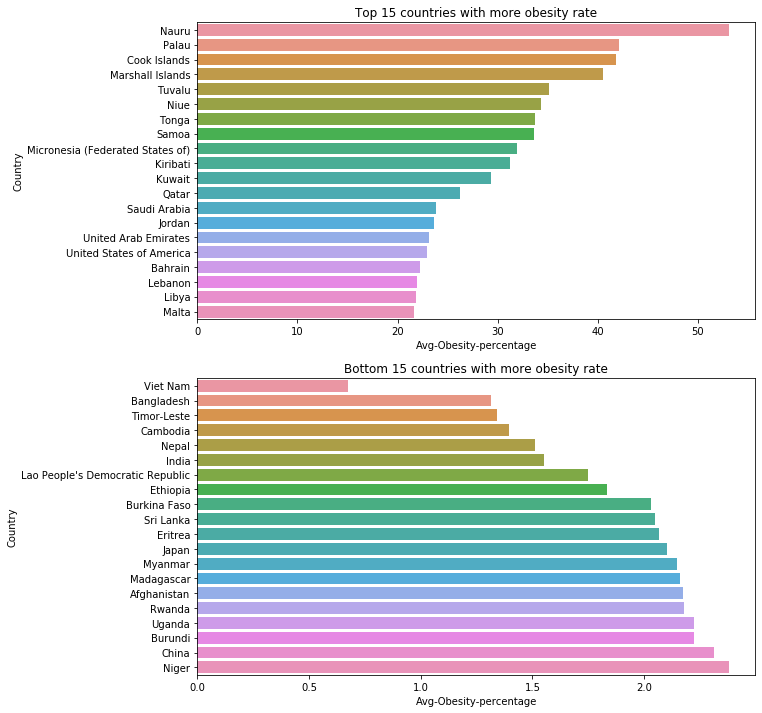

In [27]:
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(10,12))
top_15_Obesity_ratio=ObesityPerCountry.sort_values('Avg-Obesity-percentage',ascending=False).head(20) 
bottom_15_Obesity_ratio=ObesityPerCountry.sort_values('Avg-Obesity-percentage').head(20) 
sns.barplot(y=top_15_Obesity_ratio["Country"],x=top_15_Obesity_ratio['Avg-Obesity-percentage'],ax=ax1)
ax1.set_title("Top 15 countries with more obesity rate")
sns.barplot(x=bottom_15_Obesity_ratio['Avg-Obesity-percentage'],y=bottom_15_Obesity_ratio["Country"],ax=ax2)
ax2.set_title("Bottom 15 countries with more obesity rate")

In [ ]:
# Analyze united Arab emirates and United states obesity ratio 